In [1]:
import string
from collections import Counter

import matplotlib.pyplot as plt

In [8]:
import pandas as pd

data = open('avenger_movie_review.txt', 'r',encoding='utf-8').read()

In [9]:
data

'Jesus Christ! Not only does this film reach our expectations as a film, it surpasses them. There are quite a few things I like about this film so this review may take a while to read.\n\nFirstly, the Russo brothers obviously show deep appreciation for the MCU and the effort they put in for this film is clearly visible with so many awesomely-handled pivotal moments in the film’s plot. It seems that many of the MCU’s best films are directed by Anthony and Joe Russo and that doesn’t surprise me one bit.\n\nCompared to many MCU films, the acting in this film is phenomenal. Everyone in the cast deeply cares for this film and you can tell that they all understand the significance of this feature. Shout out to Jeremy Renner, who portrays Clint Barton/Hawkeye who’s character really developed into something new and better in this film and I’m looking forward to seeing the character in future instalments.\n\nAlan Silvestri is a master of musical score in media. In both Endgame and Infinity War 

In [11]:
text=data.lower()
text

'jesus christ! not only does this film reach our expectations as a film, it surpasses them. there are quite a few things i like about this film so this review may take a while to read.\n\nfirstly, the russo brothers obviously show deep appreciation for the mcu and the effort they put in for this film is clearly visible with so many awesomely-handled pivotal moments in the film’s plot. it seems that many of the mcu’s best films are directed by anthony and joe russo and that doesn’t surprise me one bit.\n\ncompared to many mcu films, the acting in this film is phenomenal. everyone in the cast deeply cares for this film and you can tell that they all understand the significance of this feature. shout out to jeremy renner, who portrays clint barton/hawkeye who’s character really developed into something new and better in this film and i’m looking forward to seeing the character in future instalments.\n\nalan silvestri is a master of musical score in media. in both endgame and infinity war 

In [12]:
#remove anchor text
import re
text=re.sub("<[^<]+>","",text)
text

'jesus christ! not only does this film reach our expectations as a film, it surpasses them. there are quite a few things i like about this film so this review may take a while to read.\n\nfirstly, the russo brothers obviously show deep appreciation for the mcu and the effort they put in for this film is clearly visible with so many awesomely-handled pivotal moments in the film’s plot. it seems that many of the mcu’s best films are directed by anthony and joe russo and that doesn’t surprise me one bit.\n\ncompared to many mcu films, the acting in this film is phenomenal. everyone in the cast deeply cares for this film and you can tell that they all understand the significance of this feature. shout out to jeremy renner, who portrays clint barton/hawkeye who’s character really developed into something new and better in this film and i’m looking forward to seeing the character in future instalments.\n\nalan silvestri is a master of musical score in media. in both endgame and infinity war 

In [13]:
#remove punctuation
import string
punc=string.punctuation
text="".join(char for char in text if char not in punc)
text

'jesus christ not only does this film reach our expectations as a film it surpasses them there are quite a few things i like about this film so this review may take a while to read\n\nfirstly the russo brothers obviously show deep appreciation for the mcu and the effort they put in for this film is clearly visible with so many awesomelyhandled pivotal moments in the film’s plot it seems that many of the mcu’s best films are directed by anthony and joe russo and that doesn’t surprise me one bit\n\ncompared to many mcu films the acting in this film is phenomenal everyone in the cast deeply cares for this film and you can tell that they all understand the significance of this feature shout out to jeremy renner who portrays clint bartonhawkeye who’s character really developed into something new and better in this film and i’m looking forward to seeing the character in future instalments\n\nalan silvestri is a master of musical score in media in both endgame and infinity war his music adds 

In [14]:
#replace of \n
text=text.replace("\n"," ")
text

'jesus christ not only does this film reach our expectations as a film it surpasses them there are quite a few things i like about this film so this review may take a while to read  firstly the russo brothers obviously show deep appreciation for the mcu and the effort they put in for this film is clearly visible with so many awesomelyhandled pivotal moments in the film’s plot it seems that many of the mcu’s best films are directed by anthony and joe russo and that doesn’t surprise me one bit  compared to many mcu films the acting in this film is phenomenal everyone in the cast deeply cares for this film and you can tell that they all understand the significance of this feature shout out to jeremy renner who portrays clint bartonhawkeye who’s character really developed into something new and better in this film and i’m looking forward to seeing the character in future instalments  alan silvestri is a master of musical score in media in both endgame and infinity war his music adds so muc

In [15]:
#remove stopwords
from nltk.corpus import stopwords
stop=stopwords.words("english")

text_cleaned=""
for word in text.split():
    if word in stop:
        pass
    else:
        text_cleaned+=" "
        text_cleaned += word
text_cleaned

' jesus christ film reach expectations film surpasses quite things like film review may take read firstly russo brothers obviously show deep appreciation mcu effort put film clearly visible many awesomelyhandled pivotal moments film’s plot seems many mcu’s best films directed anthony joe russo doesn’t surprise one bit compared many mcu films acting film phenomenal everyone cast deeply cares film tell understand significance feature shout jeremy renner portrays clint bartonhawkeye who’s character really developed something new better film i’m looking forward seeing character future instalments alan silvestri master musical score media endgame infinity war music adds much tension nearly every scene appears honestly feel involvement mcu silvestri propelled one great film composers individuals like hans zimmer john williams action film perfectly balanced downtoearth scenes film i’ll get later climatic battle particular masterpiece behold every character scene amount screen time deserve one

In [19]:
from nltk.tokenize import sent_tokenize,word_tokenize

sent_tokenize(text_cleaned)

final_words=word_tokenize(text_cleaned)

In [22]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' happy': 6, ' attached': 4, ' sad': 4, ' attracted': 3, ' independent': 3, ' free': 2, ' angry': 2, ' hated': 2, ' bored': 1, ' powerless': 1, ' demoralized': 1, ' ecstatic': 1, ' focused': 1, ' apathetic': 1, ' lost': 1, ' surprise': 1, ' anxious': 1, ' alone': 1, ' adequate': 1, ' fearless': 1, ' loved': 1, ' esteemed': 1})


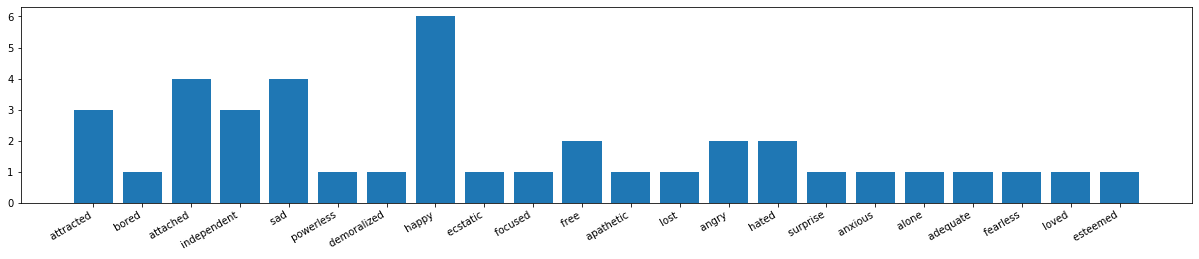

In [30]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.rcParams["figure.figsize"] = (25,4)
plt.show()